In [182]:
 # Importar librerias necesarias
import pandas as pd
import pandas
import numpy as np
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

##  Importando la base de datos y tratamiento de datos

In [183]:
 #Leer base de datos
datos=pandas.read_csv(r"C:\Users\Fer_P\OneDrive\Documentos\Repositorio Github\ProgramaKprototypes\EstanciaProyectoFinalyo2.csv",sep=",",header=0,encoding='latin1')
datos.info()
datos.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Semestre                         228 non-null    object 
 1   Empresa                          228 non-null    object 
 2   Funciones                        228 non-null    object 
 3   Limitante                        228 non-null    object 
 4   como fue el trato                228 non-null    object 
 5   Conocimiento del sistema ingles  228 non-null    object 
 6   Nivel de ingles                  228 non-null    object 
 7   Remuneracion economica           228 non-null    object 
 8   cuanto                           228 non-null    float64
 9   cuando                           228 non-null    object 
 10  Prestacion                       228 non-null    object 
 11  Entrevista                       228 non-null    object 
 12  Examenes              

,Semestre,Empresa,Funciones,Limitante,como fue el trato,Conocimiento del sistema ingles,Nivel de ingles,Remuneracion economica,cuanto,cuando,Prestacion,Entrevista,Examenes,promedio,Uniforme,Recomendaria la empresa,dirección,area o departamento
0,Sexto,Centro de investigacion y de estudios avanzado...,Diseño hardware/software,No,Bueno,No,Ket,No,0.0,No,No,No,No,0.0,No,Si,Jalisco,Sistemas digitales
1,Semestre,Envasadora GUGAR SA de CV,Manufactura,No,Bueno,No,Ket,Si,600.0,Quincenal,Si,Si,No,0.0,No,Si,Oaxaca,Ventas
2,Sexto,UTM,Diseño hardware/software,No,Bueno,Si,Bec,No,0.0,No,No,No,No,0.0,No,Si,Oaxaca,IEM UTM
3,Semestre,UTM,Investigación,No,Bueno,Si,Pet,No,0.0,No,No,No,No,0.0,No,Si,Oaxaca,IEM UTM
4,Sexto,UTM,Control,Falta de tiempo,Bueno,No,Pet,No,0.0,No,No,No,No,0.0,No,Si,Oaxaca,IEM UTM


In [184]:
datos.isnull().sum()

Semestre                           0
Empresa                            0
Funciones                          0
Limitante                          0
como fue el trato                  0
Conocimiento del sistema ingles    0
Nivel de ingles                    0
Remuneracion economica             0
cuanto                             0
cuando                             0
Prestacion                         0
Entrevista                         0
Examenes                           0
promedio                           0
Uniforme                           0
Recomendaria la empresa            0
dirección                          0
area o departamento                0
dtype: int64

In [185]:
### Eliminar datos nulos
datos=datos.dropna()
#checando valores faltantes
datos.isnull().sum()

Semestre                           0
Empresa                            0
Funciones                          0
Limitante                          0
como fue el trato                  0
Conocimiento del sistema ingles    0
Nivel de ingles                    0
Remuneracion economica             0
cuanto                             0
cuando                             0
Prestacion                         0
Entrevista                         0
Examenes                           0
promedio                           0
Uniforme                           0
Recomendaria la empresa            0
dirección                          0
area o departamento                0
dtype: int64

In [186]:
# checando la distribuccion de valores numericos
datos.describe()

,cuanto,promedio
count,228.000000,228.000000
mean,418.989474,0.353070
std,1185.785055,1.574617
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,8000.000000,8.000000


In [187]:
## Mostrar categorías de la base de datos
datos_columnas = datos.columns
datos_columnas

Index(['Semestre', 'Empresa', 'Funciones', 'Limitante', 'como fue el trato',
       'Conocimiento del sistema ingles', 'Nivel de ingles',
       'Remuneracion economica', 'cuanto', 'cuando', 'Prestacion',
       'Entrevista', 'Examenes', 'promedio', 'Uniforme',
       'Recomendaria la empresa', 'dirección', 'area o departamento'],
      dtype='object')

In [188]:
#comprobemos si hay valores anormales en las variables categóricas:
df_cat=datos[['Semestre', 'Empresa', 'Funciones', 'Limitante', 'como fue el trato',
'Conocimiento del sistema ingles', 'Nivel de ingles',
'Remuneracion economica', 'cuando', 'Prestacion',
'Entrevista', 'Examenes' , 'Uniforme',
'Recomendaria la empresa', 'dirección', 'area o departamento']]
for i in df_cat.columns:
    print(df_cat[i].unique())

['Sexto' 'Semestre' 'Octavo' 'Egresado']
['Centro de investigacion y de estudios avanzados del instituto politecnico y nacional'
 'Envasadora GUGAR SA de CV' 'UTM' 'Denoba S.A.S' 'CFE'
 'Falcon Automatizacion S.A de C.V'
 'Soluciones Inteligentes en Informatica S.a de c.v'
 'Centro de investigaciones en ciencia aplicada y tecnologia avanzada'
 'Master controls Mc tech & ADV S.A DE C.V'
 'Promotora industrial de desarrollo'
 'Centro de ciencias aplicadas y desarrollo tecnologico UNAM'
 'Denoba robotics' 'Autycom S.A DE C.V' 'INAOE'
 'Centro interdisiplinario de investigacion para el desarrollointegral regional'
 'ECON TECH S.A de C.v' 'CIMAPLAS' 'Oaxaca Aerospace' 'SFElectronics'
 'Centro de investgacion en ciencia aplicada y tecnologia avanzada(CICATA) IPN Unidad Queretaro'
 'AIAE Automatizacion industrial y ahorro de energia'
 'PRELXAID S de RL de C.V.' 'Presidencia municipal de Huajaupan de leon'
 'KARAOKULTA SAPI de c.V' 'Modutram Mexico SAPI de C.V' 'Prothesia Inc'
 'Proyecto piedr

In [189]:
#transformar etiquetas categóricas en etiquetas numéricas
df_cat=datos[['Semestre', 'Empresa', 'Funciones', 'Limitante', 'como fue el trato',
'Conocimiento del sistema ingles', 'Nivel de ingles',
'Remuneracion economica', 'cuando', 'Prestacion',
'Entrevista', 'Examenes' , 'Uniforme',
'Recomendaria la empresa', 'dirección', 'area o departamento']]
encoders={}
for col_name in df_cat.columns:
    series = df_cat[col_name]
    label_encoder = LabelEncoder()
    df_cat[col_name] = pd.Series(label_encoder.fit_transform(series[series.notnull()]),index=series[series.notnull()].index)
    encoders[col_name] = label_encoder

C:\Users\Fer_P\AppData\Local\Temp\ipykernel_9468\1820052966.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[col_name] = pd.Series(label_encoder.fit_transform(series[series.notnull()]),index=series[series.notnull()].index)


In [190]:
# Manejo de valores faltantes usando Knn para etiquetas categóricas y numéricas
#Valores numéricos
df_num=datos[['cuanto','promedio']]
imputer = KNNImputer(n_neighbors=5)
df_num.loc[:]=imputer.fit_transform(df_num)
#valores categóricos
imputer = KNNImputer(n_neighbors=1)
df_cat.loc[:]=imputer.fit_transform(df_cat)
#concatenar los datos
datos=pd.concat([df_cat,df_num], axis=1)

C:\Users\Fer_P\AppData\Local\Temp\ipykernel_9468\1845274618.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num.loc[:]=imputer.fit_transform(df_num)
C:\Users\Fer_P\AppData\Local\Temp\ipykernel_9468\1845274618.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat.loc[:]=imputer.fit_transform(df_cat)


In [191]:
#Verificando si existen outliers

from pyod.models.knn import KNN

X = pd.DataFrame(data=datos[[ 'Semestre', 'Empresa', 'Funciones', 'Limitante', 'como fue el trato',
'Conocimiento del sistema ingles', 'Nivel de ingles',
'Remuneracion economica', 'cuando', 'Prestacion',
'Entrevista', 'Examenes' , 'Uniforme',
'Recomendaria la empresa', 'dirección', 'area o departamento']])
clf = KNN(contamination=0.18)
clf.fit(X)
y_pred = clf.predict(X)
X[y_pred == 1]

,Semestre,Empresa,Funciones,Limitante,como fue el trato,Conocimiento del sistema ingles,Nivel de ingles,Remuneracion economica,cuando,Prestacion,Entrevista,Examenes,Uniforme,Recomendaria la empresa,dirección,area o departamento
0,3,17,3,4,0,0,1,0,1,0,0,0,0,1,4,17
18,3,14,10,2,0,1,0,0,1,1,0,0,0,1,1,9
21,2,5,0,1,0,1,0,1,3,0,0,0,0,1,7,3
23,2,47,6,4,0,1,3,1,0,0,0,0,0,1,13,19
34,1,83,10,4,0,1,3,1,0,0,0,0,0,1,4,4
40,3,0,0,1,0,1,0,0,1,0,0,0,0,1,9,8
46,3,76,10,1,0,1,1,0,1,0,0,0,0,0,8,17
51,2,78,4,3,0,1,3,0,1,0,1,0,0,1,5,4
69,2,82,0,4,0,1,0,1,4,1,1,1,1,1,2,15
79,2,26,2,4,0,1,0,1,3,1,1,0,0,1,10,17


In [192]:
##cargando datos
pca = PCA(2)
#Transformar los datos
d_f= pca.fit_transform(datos)
d_f.shape

(228, 2)

In [193]:
#decodicando datos categóricos porque k-prototype funciona con datos categóricos sin procesar
for i in df_cat.columns:
    datos[i]=datos[i].astype(int)
for col_name in df_cat.columns:
    datos[col_name] = encoders[col_name].inverse_transform(datos[col_name])

In [194]:
datos.info()
##datos listos para ser implementados utilizando el algoritmo K-prototype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Semestre                         228 non-null    object 
 1   Empresa                          228 non-null    object 
 2   Funciones                        228 non-null    object 
 3   Limitante                        228 non-null    object 
 4   como fue el trato                228 non-null    object 
 5   Conocimiento del sistema ingles  228 non-null    object 
 6   Nivel de ingles                  228 non-null    object 
 7   Remuneracion economica           228 non-null    object 
 8   cuando                           228 non-null    object 
 9   Prestacion                       228 non-null    object 
 10  Entrevista                       228 non-null    object 
 11  Examenes                         228 non-null    object 
 12  Uniforme              

In [195]:
# Obtener la posición de las columnas categóricas
categorical_columns = [datos.columns.get_loc(col) for col in list(datos.select_dtypes('object').columns)]
print('Categorical columns : {}'.format(list(datos.select_dtypes('object').columns)))
print('Categorical columns position : {}'.format(categorical_columns))

Categorical columns : ['Semestre', 'Empresa', 'Funciones', 'Limitante', 'como fue el trato', 'Conocimiento del sistema ingles', 'Nivel de ingles', 'Remuneracion economica', 'cuando', 'Prestacion', 'Entrevista', 'Examenes', 'Uniforme', 'Recomendaria la empresa', 'dirección', 'area o departamento']
Categorical columns position : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


In [196]:
 # Convertir dataframe a matriz
dfMatrix = datos.to_numpy()

## Aplicando K prototipes

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8


<function matplotlib.pyplot.show(close=None, block=None)>

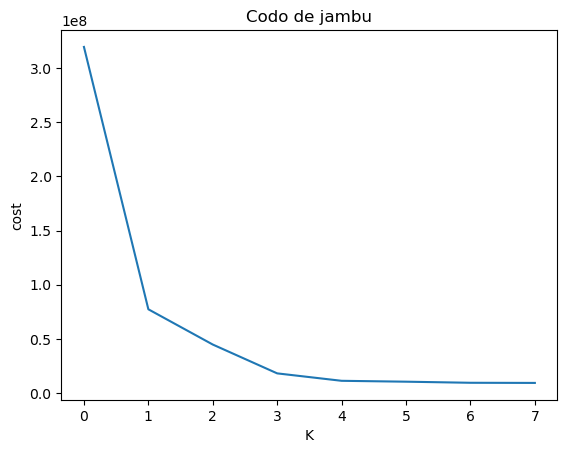

In [197]:
## Codo de jambú para seleccionar el número de clusters óptimo
## el parámetro init de la función K modes puede tener los valores "Cao", "Huang" o "Random"
cost = []
for cluster in range(1, 10):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Cao', random_state = 0, max_iter=20)
        kprototype.fit_predict(dfMatrix, categorical = categorical_columns)
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break
plt.plot(cost)
plt.title('Codo de jambu')
plt.xlabel('K')
plt.ylabel('cost')
plt.show

In [198]:
 # K-Modes
#kmode = KModes(n_clusters=5, init = "cao", n_init = 1, verbose=1)
#clusteres = kmode.fit_predict(datos)
kproto = KPrototypes(n_clusters= 3, init='Cao', n_init = 1, verbose=2, max_iter=20)
clusteres = kproto.fit_predict(datos, categorical=categorical_columns)
datos['clusters']= kproto.fit_predict(dfMatrix, categorical = categorical_columns)
#Centroides
centroides=pd.DataFrame(kproto.cluster_centroids_)
#centroides.columns=datos.columns
centroides.to_csv('Centroides.csv')


Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 14, ncost: 45712714.72168927
Run: 1, iteration: 2/20, moves: 5, ncost: 44745744.3368253
Run: 1, iteration: 3/20, moves: 1, ncost: 44724482.397012986
Run: 1, iteration: 4/20, moves: 0, ncost: 44724482.397012986
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 11, ncost: 45397298.11106692
Run: 1, iteration: 2/20, moves: 3, ncost: 44745744.3368253
Run: 1, iteration: 3/20, moves: 1, ncost: 44724482.397012986
Run: 1, iteration: 4/20, moves: 0, ncost: 44724482.397012986


In [199]:
#predict the labels of clusters.
label = kproto.fit_predict(dfMatrix, categorical = categorical_columns)
print(label)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 11, ncost: 45397298.11106692
Run: 1, iteration: 2/20, moves: 3, ncost: 44745744.3368253
Run: 1, iteration: 3/20, moves: 1, ncost: 44724482.397012986
Run: 1, iteration: 4/20, moves: 0, ncost: 44724482.397012986
[2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2 0 1 0 2 2 2 2 2 2 2 1 2 0 0 2 2
 2 2 2 2 2 2 2 0 2 2 2 1 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 1 2 2 2
 2 2 2 2 2 0 2 2 2 0 2 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 1 2 0 0 2 2 0 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 1 2 0 2 2 2 2 2 2 0 2 2 2 1 2 2 2 2 2 2
 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 0 2 2 2 2 2 2 2
 2 2 0 2 1 2]


## Mostrando resultados

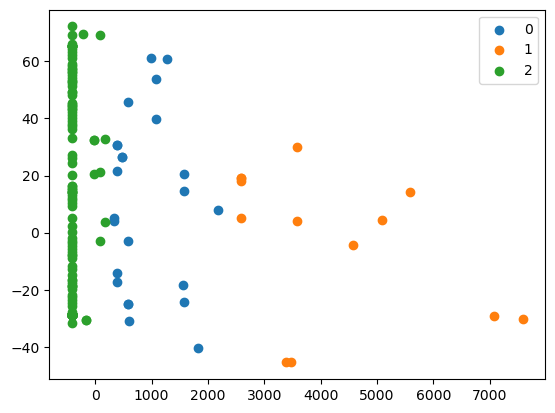

In [200]:
#Obtener etiquetas únicas
u_labels = np.unique(label)
#trazando los resultados:
for i in u_labels:
    plt.scatter(d_f[label == i , 0] , d_f[label == i , 1], label = i)
plt.legend()
plt.show()

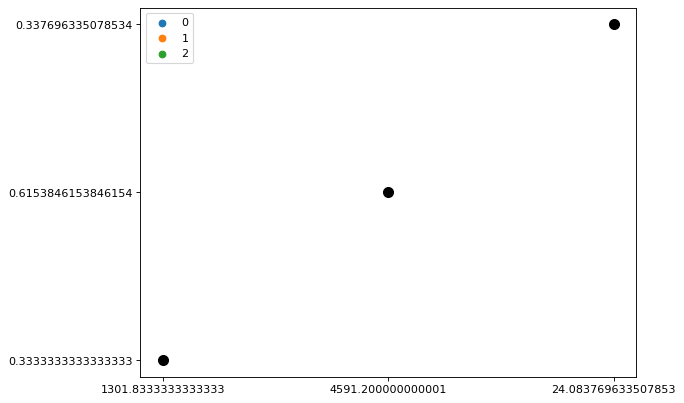

In [201]:
#Obtener los centroides de cada clúster
from matplotlib.pyplot import figure
centroids = kproto.cluster_centroids_
u_labels = np.unique(label)
figure(figsize=(8, 6), dpi=80)
#graficando los resultados:
for i in u_labels:
    plt.scatter(d_f[label == i , 0] , d_f[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

<AxesSubplot: >

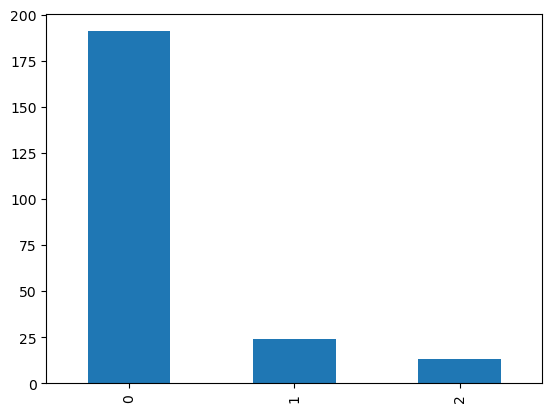

In [202]:
#el volumen de cada cluster
datos['clusters'].value_counts().plot(kind='bar')

In [203]:
#estadisticas de los datos numericos
datos.groupby(['clusters']).mean()

,cuanto,promedio
clusters,,
0,24.083770,0.337696
1,1301.833333,0.333333
2,4591.200000,0.615385


In [204]:
#estadísticas de datos categóricos por moda
centroides=datos.groupby(['clusters']).agg(lambda x: pd.Series.mode(x).iat[0])[[ 'Semestre', 'Empresa', 'Funciones', 'Limitante', 'como fue el trato',
'Conocimiento del sistema ingles', 'Nivel de ingles',
'Remuneracion economica', 'cuando', 'Prestacion',
'Entrevista', 'Examenes' , 'Uniforme',
'Recomendaria la empresa', 'dirección', 'area o departamento']]
centroides.to_csv('Centroides.csv')

In [205]:
datos.insert(0, "Cluster", clusteres, True)
datos=datos.sort_values('Cluster')

In [206]:
## Numero de individuos de cada cluster
unique, counts = np.unique(clusteres, return_counts=True)
EC1=dict(zip(unique, counts))
EC2=[]
for i in range(0,3):
    EC2.append(0)

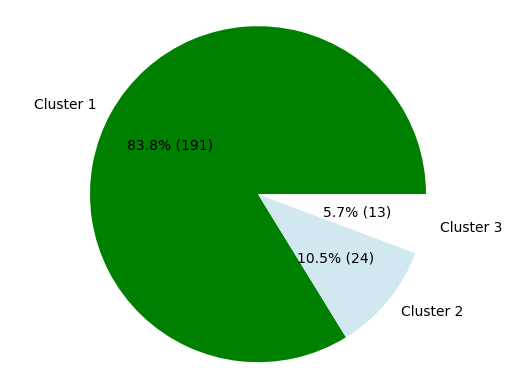

In [216]:
for i in range(0,3):
    EC2[i]=EC1[i]
def autopct_fun(abs_values):
    gen = iter(abs_values)
    return lambda pct: f"{pct:.1f}% ({next(gen)})"

nombres = ["Cluster 1","Cluster 2","Cluster 3"]
normdata = colors.Normalize(min(EC2), max(EC2))
colormap = cm.get_cmap("ocean_r")
colores =colormap(normdata(EC2))

plt.pie(EC2, labels=nombres, autopct=autopct_fun(EC2),colors=colores)
plt.axis("equal")
plt.show()

In [ ]:
datos.columns

In [ ]:
### Grafica De clase
plt.subplots(figsize = (15,3))
sns.countplot(x=datos['Semestre'],order=datos['Semestre'].value_counts().index,hue=datos['Cluster'])


In [ ]:
### Grafica de la forma del sombrero
plt.subplots(figsize = (50,10))
sns.countplot(x=datos['Funciones'],order=datos['Funciones'].value_counts().index,hue=datos['Cluster'])

In [ ]:
### Grafica del color del sombrero
plt.subplots(figsize = (15,3))
sns.countplot(x=datos['Limitante'],order=datos['Limitante'].value_counts().index,hue=datos['Cluster'])

In [ ]:
### Grafica de olor
plt.subplots(figsize = (15,3))
sns.countplot(x=datos['Conocimiento del sistema ingles'],order=datos['Conocimiento del sistema ingles'].value_counts().index,hue=datos['Cluster'])

In [ ]:
###Grafica de la poblacion
plt.subplots(figsize = (15,3))
sns.countplot(x=datos['Nivel de ingles'],order=datos['Nivel de ingles'].value_counts().index,hue=datos['Cluster'])

In [ ]:
### Grafica del habitat
plt.subplots(figsize = (40,10))
sns.countplot(x=datos['area o departamento'],order=datos['area o departamento'].value_counts().index,hue=datos['Cluster'])